In [1]:
#https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

print("Step 1: Upload Dataset")
from google.colab import files
uploaded = files.upload()

print("\nStep 2: Loading Dataset")
df = pd.read_csv('cardio_train.csv', sep=';')
print("Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Step 1: Upload Dataset


Saving cardio_train.csv to cardio_train.csv

Step 2: Loading Dataset
Dataset loaded successfully!
Shape of dataset: (70000, 13)

First 5 rows:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [2]:
# Data Preprocessing

print("\nStep 3: Data Preprocessing")

# Drop ID column
print("Dropping 'id' column...")
df.drop(columns=['id'], inplace=True)

# Convert age from days to years
print("Converting age from days to years...")
df['age'] = (df['age'] / 365).round().astype(int)

# One-hot encode categorical variables
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
print(f"Encoding categorical columns: {categorical_cols}")
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Separate features & target
X = df.drop(columns=['cardio'])
y = df['cardio']

print("Data preprocessing complete.")
print("Number of features after encoding:", X.shape[1])

# Scale features
print("\nScaling features using StandardScaler...")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Feature scaling complete.")


Step 3: Data Preprocessing
Dropping 'id' column...
Converting age from days to years...
Encoding categorical columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
Data preprocessing complete.
Number of features after encoding: 13

Scaling features using StandardScaler...
Feature scaling complete.


In [7]:
# Train-test split
print("\nSplitting data into training and testing sets (80-20 split)")
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])




Splitting data into training and testing sets (80-20 split)
Training set size: 56000
Testing set size: 14000


In [8]:
# Model Training

print("\nStep 4: Training Models")
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error

models = {
    "OLS": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet()
}

param_grids = {
    "OLS": {},
    "Lasso": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "Ridge": {"alpha": [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {"alpha": [0.001, 0.01, 0.1, 1, 10], "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]}
}

results = {}
# Train scikit-learn models
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    if param_grids[name]:
        print(f"Tuning hyperparameters for {name}...")
        grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        print(f"Best parameters for {name}: {grid.best_params_}")
    else:
        best_model = model.fit(X_train, y_train)
        print(f"{name} has no hyperparameters to tune.")

    # Predictions
    train_preds = best_model.predict(X_train)
    test_preds = best_model.predict(X_test)

    # Errors
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    results[name] = {
        "Model": best_model,
        "Train MSE": train_mse,
        "Test MSE": test_mse
    }

    print(f"Training MSE for {name}: {train_mse:.4f}")
    print(f"Testing MSE for {name}: {test_mse:.4f}")



Step 4: Training Models

--- Training OLS ---
OLS has no hyperparameters to tune.
Training MSE for OLS: 0.2204
Testing MSE for OLS: 0.2179

--- Training Lasso ---
Tuning hyperparameters for Lasso...
Best parameters for Lasso: {'alpha': 0.001}
Training MSE for Lasso: 0.2204
Testing MSE for Lasso: 0.2180

--- Training Ridge ---
Tuning hyperparameters for Ridge...
Best parameters for Ridge: {'alpha': 10}
Training MSE for Ridge: 0.2204
Testing MSE for Ridge: 0.2179

--- Training ElasticNet ---
Tuning hyperparameters for ElasticNet...
Best parameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.1}
Training MSE for ElasticNet: 0.2204
Testing MSE for ElasticNet: 0.2179



=== Step 5: Training Gradient Descent Linear Regression ===
Iteration 0: Training MSE = 0.4881
Iteration 200: Training MSE = 0.2205
Iteration 400: Training MSE = 0.2204
Iteration 600: Training MSE = 0.2204
Iteration 800: Training MSE = 0.2204
Gradient Descent OLS - Train MSE: 0.2204
Gradient Descent OLS - Test MSE: 0.2179

Step 6: Final Model Comparison
OLS -> Train MSE: 0.2204 | Test MSE: 0.2179
Lasso -> Train MSE: 0.2204 | Test MSE: 0.2180
Ridge -> Train MSE: 0.2204 | Test MSE: 0.2179
ElasticNet -> Train MSE: 0.2204 | Test MSE: 0.2179
GradientDescent_OLS -> Train MSE: 0.2204 | Test MSE: 0.2179

Plotting MSE comparison chart...


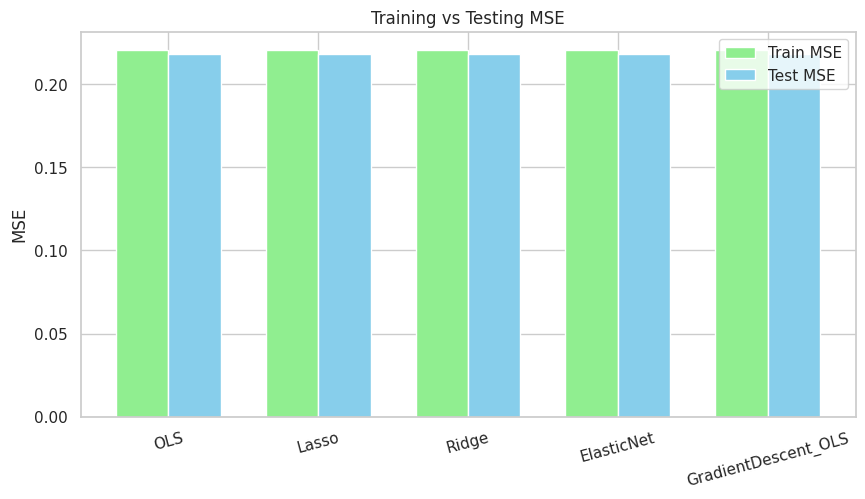

In [9]:
# Gradient Descent Linear Regression

print("\n=== Step 5: Training Gradient Descent Linear Regression ===")

# Add bias term
X_train_gd = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_gd = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights
theta = np.zeros(X_train_gd.shape[1])

# Hyperparameters
alpha = 0.01  # learning rate
n_iterations = 1000
m = X_train_gd.shape[0]

# Gradient descent loop
for iteration in range(n_iterations):
    gradients = 2/m * X_train_gd.T.dot(X_train_gd.dot(theta) - y_train)
    theta -= alpha * gradients
    if iteration % 200 == 0:
        cost = mean_squared_error(y_train, X_train_gd.dot(theta))
        print(f"Iteration {iteration}: Training MSE = {cost:.4f}")

# Predictions
train_preds_gd = X_train_gd.dot(theta)
test_preds_gd = X_test_gd.dot(theta)

train_mse_gd = mean_squared_error(y_train, train_preds_gd)
test_mse_gd = mean_squared_error(y_test, test_preds_gd)

results["GradientDescent_OLS"] = {
    "Model": "Custom Gradient Descent",
    "Train MSE": train_mse_gd,
    "Test MSE": test_mse_gd
}

print(f"Gradient Descent OLS - Train MSE: {train_mse_gd:.4f}")
print(f"Gradient Descent OLS - Test MSE: {test_mse_gd:.4f}")


# Results

print("\nStep 6: Final Model Comparison")
for name, info in results.items():
    print(f"{name} -> Train MSE: {info['Train MSE']:.4f} | Test MSE: {info['Test MSE']:.4f}")

# Plot MSE comparison
print("\nPlotting MSE comparison chart...")
x_labels = list(results.keys())
train_errors = [info['Train MSE'] for info in results.values()]
test_errors = [info['Test MSE'] for info in results.values()]

x = np.arange(len(x_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_errors, width, label='Train MSE', color='lightgreen')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test MSE', color='skyblue')

ax.set_ylabel('MSE')
ax.set_title('Training vs Testing MSE')
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=15)
ax.legend()
plt.show()